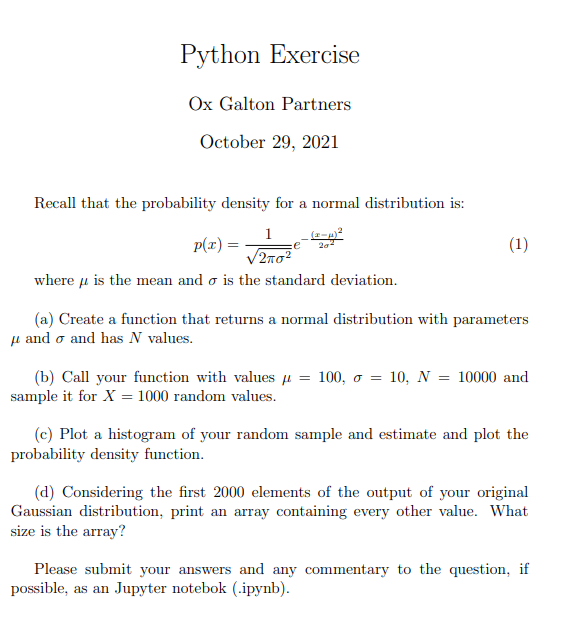

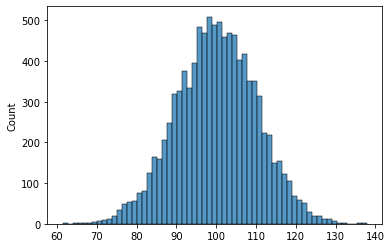

In [2]:
# a) 
# creating a normal distribution is a standard function in numpy 
# where μ = loc, σ = scale, N = size 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as pp
import seaborn as sb
import scipy as sci
import random as rnd
import math as mt

normal_dist = np.random.normal(loc=100, scale=10, size=10000)
sb.histplot(normal_dist);

In [3]:
# a) 
# however that doesn't seem to be the point of the question, let's write our own function
# mathemetically there are a number of ways we can generate a normal distribution 
# i.e. Central limit therom, Box Mueller, Marsaglia polar etc. 
# I'm using Box Mueller as I have previously studied it
# for this we need to turn √-2ln(X) * cos(2πY) * σ + μ into code:


def normal_distribution (μ , σ, N):
    normal_dist = []
    for i in range(N):
        a = mt.sqrt(-2*mt.log(rnd.random())) 
        b = mt.cos(2*mt.pi*rnd.random())
        c = a * b * σ + μ
        normal_dist.append(c)
    return normal_dist

ND = normal_distribution(100, 10, 10000)

# we can prove this distribution is normal as a normal distribution will have a kurtosis of 3 and skew of 0

print (" Kurtosis = ", round(sci.stats.kurtosis(ND, fisher=False), 1))
print (" Skew = ", round(sci.stats.skew(ND), 1))

 Kurtosis =  2.9
 Skew =  0.0


In [5]:
# b) 
# as this data type is a list we use the base python random module, however if we were still working with the numpy array 
# we would have to use the numpy random module as it is a numpy.darray
# e.g. sample = np.random.choice(normal_dist, 1000)


ND = normal_distribution(100, 10, 10000)
Sample = rnd.sample(ND, 1000)
print("This sample contains", len(Sample), "values they are:\n", ND)

This sample contains 1000 values they are:
 [106.23731995674282, 124.29561899068696, 104.00854537487707, 96.63250237774528, 98.79972224047711, 95.56768756677295, 96.28137976366374, 105.82757819328633, 81.54395075976805, 95.83866245888453, 89.69206095177825, 100.00805595693272, 113.29216328043108, 98.46631218389462, 82.94864815702441, 103.87293977052582, 80.73952341038543, 89.35083080131369, 105.02498754157466, 103.2256962610732, 102.20008654348497, 90.79323616692136, 100.27359567234915, 85.33935967667863, 105.10755468398413, 101.94129824663935, 104.09033630823694, 89.12535066843773, 92.24533739313817, 92.5349089699807, 108.08767695717788, 83.2605335090083, 99.73784766940784, 105.44310774124499, 106.5161425535053, 99.84402918025192, 96.36623395555014, 100.92261358723094, 112.15344572770366, 108.8635016764283, 97.52815452029395, 86.73361957582034, 92.89638361344053, 86.70236927324409, 97.5674404757032, 104.85727973558977, 93.83913268074924, 98.1452579202041, 99.7743023709849, 90.61279973

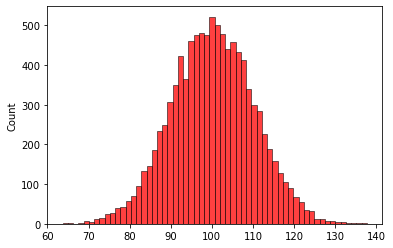

In [6]:
# c) 
# we plot a histrogram with histplot 


sb.histplot(ND, color = 'red');

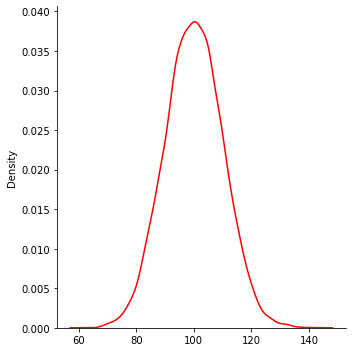

In [103]:
# c) 
# plot a pdf with displot


sb.displot(ND, color = 'red', kind ="kde");

In [7]:
# d) 
# wasn't entirely sure whether this question wanted every 2nd sample from the 2,000 
# or every other sample as in all not in the 2,000. I did both 


Sample_2 = rnd.sample(ND, 2000)
Sample_2.sort()
Sample_2_odds = []

for index, item in enumerate(Sample_2):
    if index % 2 == 0:
        Sample_2_odds.append(item)

print("The list contains", len(Sample_2_odds) ,"items:\n", Sample_2_odds)

The list contains 1000 items:
 [68.79548125272818, 69.46034014295503, 71.98118604617358, 72.77817556623486, 73.17882224090563, 74.21179542587619, 75.03244694959861, 76.25253470124123, 76.30184452502809, 76.6293676210979, 76.8068823945672, 76.83983879577544, 77.50691432179141, 77.66001117033662, 77.95054904195752, 78.0763719119237, 78.27157190845091, 78.36584391436462, 78.50956660571694, 79.05024716087419, 79.16317035754939, 79.25181212345214, 79.44939643000698, 79.62338256646974, 79.81725835702063, 80.5117115877103, 80.58996905032463, 80.73952341038543, 80.85536775521123, 81.1885737559264, 81.35293744647004, 81.56307498113347, 81.7690480605464, 82.12634056014534, 82.34988433654169, 82.48513964315919, 82.5596176868767, 82.72259640684688, 82.74918445461411, 82.90883687826454, 83.05325513281478, 83.07496659792291, 83.13997226365493, 83.22003947460135, 83.34736730176208, 83.45249852113243, 83.52250385228155, 83.78616298267733, 83.90386209929711, 83.93972614949948, 84.16051044117475, 84.171

In [9]:
# d) 
# solution 2

ND.sort()
df = pd.DataFrame(ND, columns =["Population"])
df2 = pd.DataFrame(Sample_2, columns =["Sample_2"])
c_df = pd.concat([df, df2], axis=1, join="outer")
c_df["Sample in Pop"] = c_df.Population.isin(Sample_2)

c_df
c_df

,Population,Sample_2,Sample in Pop
0,63.665703,68.795481,False
1,65.380789,69.230322,False
2,67.719240,69.460340,False
3,67.833220,71.979037,False
4,68.732899,71.981186,False
...,...,...,...
9995,134.247778,NaN,False
9996,135.358090,NaN,False
9997,135.373640,NaN,False
9998,136.571799,NaN,False


In [11]:
# 8,000 values

c_df[~c_df["Sample in Pop"]]

,Population,Sample_2,Sample in Pop
0,63.665703,68.795481,False
1,65.380789,69.230322,False
2,67.719240,69.460340,False
3,67.833220,71.979037,False
4,68.732899,71.981186,False
...,...,...,...
9995,134.247778,NaN,False
9996,135.358090,NaN,False
9997,135.373640,NaN,False
9998,136.571799,NaN,False


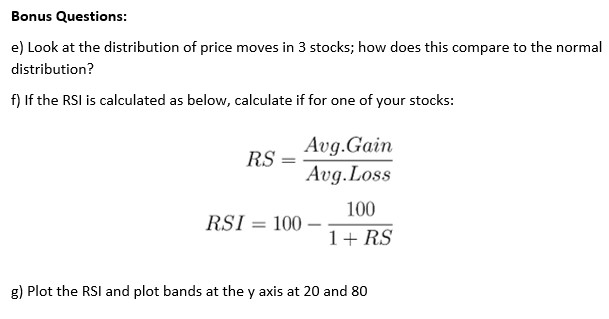

In [108]:
# e) 
# in finance we very commonly see leptokurtic dsitributions which have a higher kurtosis than the normal distribution 
# using 5 min tick data downloaded from Eikon for October for Tesla, Unilever and Nintendo

tickers = ["TSLA", "NINT", "ULVR"]
dfs = {}

for name in tickers:
    df = pd.read_csv(name+".csv")
    dfs[name] = df
 
dfs["TSLA"]

,Local Date,Local Time,Close,Net,%Chg,Open,Low,High,Volume
0,29-Oct-21,21:05,"1,114.50",0.32,0.03,"1,114.18","1,114.00","1,114.50","989,663"
1,29-Oct-21,21:00,"1,114.18",3.42,0.31,"1,110.84","1,110.29","1,115.21","1,281,527"
2,29-Oct-21,20:55,"1,110.76",6.18,0.56,"1,104.46","1,104.17","1,110.94","1,096,355"
3,29-Oct-21,20:50,"1,104.58",2.03,0.18,"1,102.58","1,102.37","1,104.78","558,421"
4,29-Oct-21,20:45,"1,102.55",1.28,0.12,"1,101.40","1,101.26","1,103.40","431,431"
...,...,...,...,...,...,...,...,...,...
1575,04-Oct-21,14:55,796.88,-0.73,-0.09,797.66,796.7,801.69,"1,052,225"
1576,04-Oct-21,14:50,797.61,1.81,0.23,795.75,795.6,799.3,"796,016"
1577,04-Oct-21,14:45,795.8,2.08,0.26,793.54,793.12,796.51,"744,871"
1578,04-Oct-21,14:40,793.72,-6.91,-0.86,800.61,791,801.62,"1,131,207"


For TSLA 
The maximum 5 minute change was 5.6 %
The minimum 5 minute change was -2.03 %
The mean was 0.0216 %
The skew was  4.4
The kurtosis of this distribution was 77.1


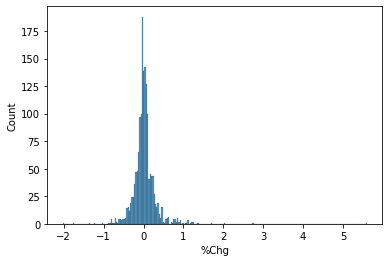

For NINT 
The maximum 5 minute change was 2.17 %
The minimum 5 minute change was -3.02 %
The mean was 0.0039 %
The skew was  0.0
The kurtosis of this distribution was 39.3


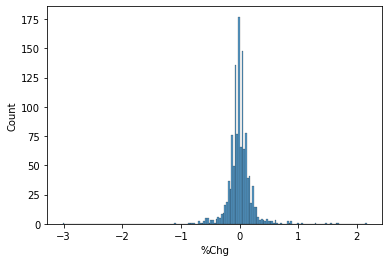

For ULVR 
The maximum 5 minute change was 0.95 %
The minimum 5 minute change was -0.83 %
The mean was -0.0004 %
The skew was  0.4
The kurtosis of this distribution was 14.3


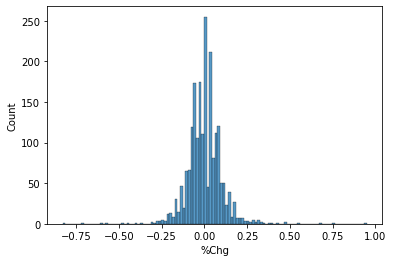

In [109]:
# e) 
# we have loaded these data frames into a dictionary now lets look at their distributions 

for item in dfs : 
    print("For", item, "\nThe maximum 5 minute change was", dfs[item]["%Chg"].max(),"%")
    print("The minimum 5 minute change was",dfs[item]["%Chg"].min(),"%")
    print("The mean was",round(dfs[item]["%Chg"].mean(), 4),"%")
    print ("The skew was ", round(sci.stats.skew(dfs[item]["%Chg"]), 1))
    print( "The kurtosis of this distribution was", round(sci.stats.kurtosis(dfs[item]["%Chg"], fisher=False), 1))
    sb.histplot(dfs[item], x = "%Chg", element="bars");
    pp.show()


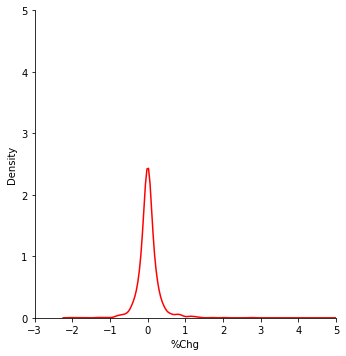

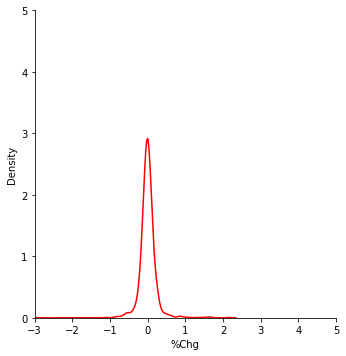

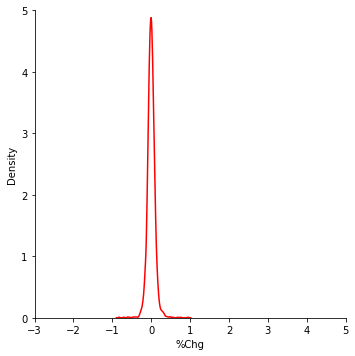

In [110]:
# e) 
# whilst we are only looking over a small time frame all of these distributions are significantly leptokurtic 
# the skew on Tesla is particularly strong, though not suprising given the crazy month it had 
# now plotting pdfs on a constant axes 


for item in dfs : 
    sb.displot(dfs[item]["%Chg"], color = 'red', kind ="kde")
    pp.xlim(-3, 5)
    pp.ylim(0, 5)
    pp.show
    

<function matplotlib.pyplot.show(close=None, block=None)>

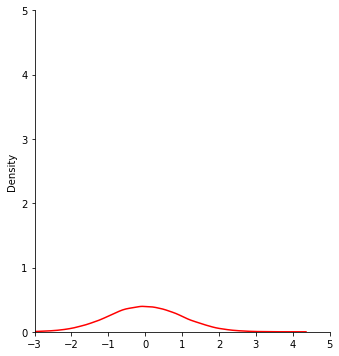

In [111]:
# e) 
# vs the normal distribution

ND = normal_distribution(0, 1, 100000, 2)

sb.displot(ND, color = 'red', kind ="kde");
pp.xlim(-3, 5)
pp.ylim(0, 5)
pp.show

In [112]:
# e)
# we can see they are quite different. 
# famously not accounting for distributions not being normal was what brought down LTCM in the 1990's

In [113]:
# f)
# we can add in new columns to the data frame for each of these calculations 
# whilst RSI is typically calculated daily and looked at over a 14 day average here we are using 5 min periods and using 
# 10 period intervals


dfs["TSLA"]["Net Gain"] = dfs["TSLA"]["%Chg"].clip(lower=0)
dfs["TSLA"]["Net Loss"] = dfs["TSLA"]["%Chg"].clip(upper=0).abs()
dfs["TSLA"]["Avg Gain"] = dfs["TSLA"]["Net Gain"].rolling(window=10).mean()
dfs["TSLA"]["Avg Loss"] = dfs["TSLA"]["Net Loss"].rolling(window=10).mean()
dfs["TSLA"]["RS"] = dfs["TSLA"]["Avg Gain"]  / dfs["TSLA"]["Avg Loss"]
dfs["TSLA"]["RSI_10"] = 100 - (100 / (1.0 + dfs["TSLA"]["RS"] ))

dfs["TSLA"]

,Local Date,Local Time,Close,Net,%Chg,Open,Low,High,Volume,Net Gain,Net Loss,Avg Gain,Avg Loss,RS,RSI_10
0,29-Oct-21,21:05,"1,114.50",0.32,0.03,"1,114.18","1,114.00","1,114.50","989,663",0.03,0.00,NaN,NaN,NaN,NaN
1,29-Oct-21,21:00,"1,114.18",3.42,0.31,"1,110.84","1,110.29","1,115.21","1,281,527",0.31,0.00,NaN,NaN,NaN,NaN
2,29-Oct-21,20:55,"1,110.76",6.18,0.56,"1,104.46","1,104.17","1,110.94","1,096,355",0.56,0.00,NaN,NaN,NaN,NaN
3,29-Oct-21,20:50,"1,104.58",2.03,0.18,"1,102.58","1,102.37","1,104.78","558,421",0.18,0.00,NaN,NaN,NaN,NaN
4,29-Oct-21,20:45,"1,102.55",1.28,0.12,"1,101.40","1,101.26","1,103.40","431,431",0.12,0.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,04-Oct-21,14:55,796.88,-0.73,-0.09,797.66,796.7,801.69,"1,052,225",0.00,0.09,0.098,0.206,0.475728,32.236842
1576,04-Oct-21,14:50,797.61,1.81,0.23,795.75,795.6,799.3,"796,016",0.23,0.00,0.121,0.203,0.596059,37.345679
1577,04-Oct-21,14:45,795.8,2.08,0.26,793.54,793.12,796.51,"744,871",0.26,0.00,0.147,0.132,1.113636,52.688172
1578,04-Oct-21,14:40,793.72,-6.91,-0.86,800.61,791,801.62,"1,131,207",0.00,0.86,0.147,0.204,0.720588,41.880342


<function matplotlib.pyplot.show(close=None, block=None)>

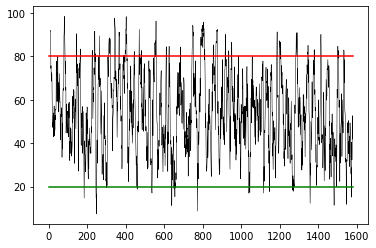

In [114]:
# f)
# plotting this and adding in bands 


pp.plot(dfs["TSLA"]["RSI_10"], linewidth=0.5, color="black");
pp.plot([0, 1580], [20, 20], color="green")
pp.plot([0, 1580], [80, 80], color="red")
pp.show

In [115]:
dfs["TSLA"].to_csv(r"TSLA_RSI_10_Test.csv")

In [116]:
# the obvious next steps to this project are: h
# - create a flag which when the threshold is crossed buys (under 20) or sells (over 80) the stock
# - back test this strategy and see whether it would work or lose money
# - run this for larger timeframes and for a larger amounts of stocks
# - it will likely make money over some timeframes/companies and lose for others. Why? is this just noise or is there any 
#   statistical significance to the results
# - run this analysis for different strategies, possibly could look at a mean reversion where recent price movement has 
#   deviated significantly from the mean distribution?
# - add in real world factors, earnings dates, dividends, central bank dates etc. 
# I was having good fun with this project so plan to continue it when I am back from Scotland:
# https://github.com/SeanLeCornu/Back-Testing